# nltk clustering

Clustering of web pages using 'bag of words'and TF-IDF representation
___
Resources and links:
* NLTK: http://www.nltk.org/
* Beautiful Soup: http://www.crummy.com/software/BeautifulSoup/
* Scikit-learn: http://scikit-learn.org/
* Recipe: Text clustering using NLTK and scikit-learn: https://nlpforhackers.io/recipe-text-clustering/
* Document Similarity using NLTK and Scikit-Learn: http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html
* Representación de documentos mediante TF-IDF: https://www.youtube.com/watch?v=OkSZZ0F7ToA
Previously:
* Install NLTK
  python3 -m pip install --user -U nltk
* Install beautifulsoup4
  python3 -m pip install --user -U beautifulsoup4
* Install scikit-learn
  python3 -m pip install --user -U scikit-learn
* Download html files in 'path' directory (see 'descargas.scr')

## Processing

### Import libraries

In [1]:
#!/usr/python3

import nltk
import string
import os
import collections

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('punk_tab')

from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import sys

### Read html files

In [2]:
# Read all html files in path and transform in text
#   If you get an UnicodeDecodeError remove file content in 'file' varaible
path = './france_rat_crazy'
path = os.path.join(path, 'html')
translate_table = dict((ord(char), ' ') for char in string.punctuation)
token_dict = {}
for subdir, dirs, files in os.walk(path):
    for file in files:
        file_path = subdir + os.path.sep + file
        shakes = open(file_path, 'r')
        try:
            html = shakes.read()
        except Exception:
            continue
        # Extract text from html
        text = BeautifulSoup(html).get_text().encode('ascii', 'ignore')
        # Lowercase and remove punctuation
        lowers = str(text.lower())
        no_punctuation = lowers.translate(translate_table)
        token_dict[file] = no_punctuation

# Show number of reading files
print(len(token_dict))

110


### Model - Tokenize and clean text

In [3]:
# Tokenizer function
def process_text(text, stem=True):
    """Tokenize text and stem words removing punctuation"""
    # text = text.translate(None, string.punctuation)
    tokens = word_tokenize(text)
    if stem:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(t) for t in tokens]
    return tokens

# Transform texts to Tf-Idf coordinates
# (http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
#  If you get an "UserWarning: Your stop_words may be inconsistent" ignore it
stop_words = [process_text(w)[0] for w in stopwords.words('english')]
vectorizer = TfidfVectorizer(tokenizer=process_text,
                             stop_words=stop_words,
                             max_df=0.5,
                             min_df=0.1,
                             lowercase=True)
tfidf_model = vectorizer.fit_transform(token_dict.values())

# Show dimensions of tfidf_model
print(tfidf_model)

/home/edhey/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/edhey/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


  (0, 773)	0.013687856955498123
  (0, 530)	0.015227348593411584
  (0, 195)	0.01575073983822462
  (0, 606)	0.01766630422201033
  (0, 747)	0.01200609677504254
  (0, 619)	0.01766630422201033
  (0, 672)	0.010239063510847097
  (0, 593)	0.01295784655666705
  (0, 528)	0.010461874342774817
  (0, 910)	0.01766630422201033
  (0, 552)	0.01295784655666705
  (0, 415)	0.016324050080827556
  (0, 450)	0.01766630422201033
  (0, 734)	0.017301634711233537
  (0, 742)	0.018915297507295613
  (0, 844)	0.016324050080827556
  (0, 763)	0.03206113451089165
  (0, 132)	0.03693904576808915
  (0, 244)	0.014300100697849826
  (0, 262)	0.01766630422201033
  (0, 702)	0.01295784655666705
  (0, 343)	0.038793541559212656
  (0, 429)	0.016324050080827556
  (0, 908)	0.011057926407216836
  (0, 885)	0.01498179593964478
  :	:
  (109, 800)	0.07834197120765433
  (109, 457)	0.016709252174209856
  (109, 52)	0.03813007749183797
  (109, 858)	0.01993185246771877
  (109, 49)	0.0408258428401658
  (109, 468)	0.09069677965965325
  (109, 595

### Testing model

In [4]:
# Show selected tokens
#   On old versions of scikit-learn change 'get_feature_names_out' method by
#   'get_feature_names'
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

# Example of a sentence Tf-Idf vectorization
sentence = 'Italy has many beautiful cities and animals'
response = vectorizer.transform([sentence])
for col in response.nonzero()[1]:
    print(feature_names[col], ' - ', response[0, col])

['0' '000' '01' '02' '03' '04' '05' '06' '07' '09' '1' '10' '100' '11'
 '12' '13' '14' '15' '16' '17' '18' '19' '20' '2010' '2011' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023' '2024' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '33' '34' '35' '37' '39'
 '4' '40' '42' '43' '5' '50' '500' '53' '56' '6' '60' '7' '8' '9' 'accept'
 'access' 'accord' 'account' 'across' 'act' 'action' 'activ' 'ad' 'addit'
 'address' 'administr' 'advanc' 'affair' 'affect' 'africa' 'age' 'agenc'
 'agenda' 'agre' 'agreement' 'agricultur' 'ahead' 'ai' 'air' 'al' 'alert'
 'allianc' 'allow' 'almost' 'along' 'alp' 'also' 'america' 'american'
 'among' 'analysi' 'anim' 'ann' 'announc' 'annual' 'anoth' 'answer'
 'appli' 'applic' 'appoint' 'approach' 'april' 'archiv' 'area' 'around'
 'arriv' 'art' 'articl' 'artist' 'asia' 'ask' 'assembl' 'assist' 'associ'
 'au' 'august' 'author' 'aux' 'avail' 'award' 'back' 'bank' 'base'
 'beauti' 'becam' 'becom' 'begin' 'behind' 'benefit' 'best'

## Clustering

### Clustering with KMeans - 3 clusters

In [5]:
# Cluster texts using K-Means
# (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
#   On old versions of scikit-learn remove 'n_init' parameter
km_model = KMeans(n_clusters=3, n_init='auto', verbose=0)
km_model.fit(tfidf_model)

# Print clusters
clusters = collections.defaultdict(list)
for idx, label in enumerate(km_model.labels_):
    clusters[label].append(idx)

print(dict(clusters))

# Print number of elements of each cluster
for key, elements in dict(clusters).items():
    print(str(key) + ':', len(elements))

# Print labels of each url webpage
key = list(token_dict.keys())
for idx, label in enumerate(km_model.labels_):
    print(str(label) + ':', key[idx].replace('_','/').replace('.html',''))

# Print 4 most relevant tokens of each cluster
kmcc = km_model.cluster_centers_.copy()
for idx, item in enumerate(dict(clusters).items()):
    print(str(item[0]) + ':')
    for j in range(4):
        idxmax = kmcc[idx].argmax()
        print('  ', feature_names[idxmax], ' - ', kmcc[idx][idxmax])
        kmcc[idx][idxmax] = 0.0
    print()

{2: [0, 1, 11, 12, 13, 14, 18, 20, 21, 22, 25, 27, 28, 29, 30, 31, 32, 36, 38, 40, 42, 44, 47, 54, 55, 59, 62, 65, 66, 70, 73, 74, 75, 77, 79, 80, 83, 85, 88, 91, 92, 93, 97, 99, 100, 102, 104, 106, 107, 108], 0: [2, 4, 6, 7, 8, 9, 10, 15, 16, 17, 19, 24, 34, 35, 37, 39, 41, 43, 45, 46, 48, 49, 50, 51, 53, 56, 57, 58, 60, 61, 64, 67, 68, 69, 72, 76, 78, 81, 82, 86, 87, 89, 94, 95, 96, 103, 105, 109], 1: [3, 5, 23, 26, 33, 52, 63, 71, 84, 90, 98, 101]}
2: 50
0: 48
1: 12
2: https://www.letour.fr/en/overall-route
2: https://knds.com/en/subsidiaries/knds-france
0: https://francedigitale.org/en
1: https://www.france.fr/es/
0: https://www.cfht.hawaii.edu/
1: https://www.france.fr/es/archivos/
0: https://crazybeargroup.co.uk/
0: https://www.businessfrance.fr/en
0: https://travel.state.gov/content/travel/en/traveladvisories/traveladvisories/france-travel-advisory
0: https://housinganywhere.com/France/language-barrier-in-france
0: https://rgd.mcw.edu/
2: https://hudoc.echr.coe.int/
2: https://e

### Elbow method

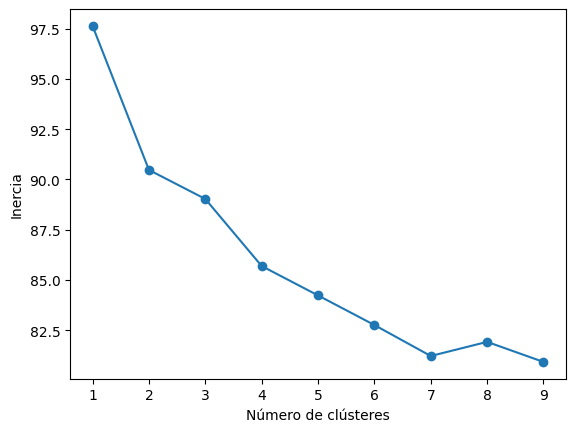

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(tfidf_model)
    inertias.append(model.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')
plt.show()

In [32]:
# Cluster texts using K-Means
# (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
#   On old versions of scikit-learn remove 'n_init' parameter
km_model = KMeans(n_clusters=5, n_init='auto', verbose=0)
km_model.fit(tfidf_model)

# Print clusters
clusters = collections.defaultdict(list)
for idx, label in enumerate(km_model.labels_):
    clusters[label].append(idx)

print(dict(clusters))

# Print number of elements of each cluster
for key, elements in dict(clusters).items():
    print(str(key) + ':', len(elements))

# Print labels of each url webpage
key = list(token_dict.keys())
for idx, label in enumerate(km_model.labels_):
    print(str(label) + ':', key[idx].replace('_','/').replace('.html',''))

# Print 4 most relevant tokens of each cluster
kmcc = km_model.cluster_centers_.copy()
for idx, item in enumerate(dict(clusters).items()):
    print(str(item[0]) + ':')
    for j in range(4):
        idxmax = kmcc[idx].argmax()
        print('  ', feature_names[idxmax], ' - ', kmcc[idx][idxmax])
        kmcc[idx][idxmax] = 0.0
    print()

{4: [0, 1, 2, 4, 6, 8, 9, 13, 14, 17, 18, 19, 24, 25, 27, 28, 30, 37, 40, 41, 42, 44, 48, 49, 51, 57, 58, 59, 60, 61, 70, 72, 73, 81, 82, 86, 94, 102, 105, 109], 3: [3, 5, 23, 26, 33, 52, 63, 71, 84, 90, 98, 101], 0: [7, 11, 12, 15, 16, 21, 22, 29, 31, 32, 34, 39, 43, 47, 55, 62, 65, 69, 74, 76, 89, 91, 95, 96, 97], 1: [10, 35, 46, 50, 53, 56, 64, 68, 78, 87], 2: [20, 36, 38, 45, 54, 66, 67, 75, 77, 79, 80, 83, 85, 88, 92, 93, 99, 100, 103, 104, 106, 107, 108]}
4: 40
3: 12
0: 25
1: 10
2: 23
4: https://www.letour.fr/en/overall-route
4: https://knds.com/en/subsidiaries/knds-france
4: https://francedigitale.org/en
3: https://www.france.fr/es/
4: https://www.cfht.hawaii.edu/
3: https://www.france.fr/es/archivos/
4: https://crazybeargroup.co.uk/
0: https://www.businessfrance.fr/en
4: https://travel.state.gov/content/travel/en/traveladvisories/traveladvisories/france-travel-advisory
4: https://housinganywhere.com/France/language-barrier-in-france
1: https://rgd.mcw.edu/
0: https://hudoc.echr